# Agenda on Pandas -2
1. Change the type of data in the column
2. Rename the column
3. Fill missing value
4. Groupby
5. Merge
6. Pivot Table

---

7. Visualization

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 74)
pd.set_option('display.width', 500)

titanicDf = sns.load_dataset('titanic')
taxisDf = sns.load_dataset('taxis')
print(titanicDf.info())
print(titanicDf.head())

print(taxisDf.info())
print(taxisDf.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  

## 1. change Type of column

In [ ]:
def CheckBool(x):
    if x =="no":
        return False
    else:
        return True
titanicDf["alive"] = titanicDf.apply(lambda x: CheckBool(x["alive"]),axis = 1)
print(titanicDf)

################
# titanicDf["fare"] = titanicDf.apply(lambda x: str(x["fare"])+"$",axis = 1)

# print(titanicDf.info())
# print(titanicDf.head())

# titanicDf["fare"] = titanicDf.apply(lambda x: float(x["fare"].split("$")[0]),axis = 1)
# print(titanicDf.head())
# ################



print(taxisDf.info())
taxisDf['pickup'] =  pd.to_datetime(taxisDf['pickup'], format='%Y-%m-%d %H:%M:%S') # https://docs.python.org/3.7/library/datetime.html#strftime-strptime-behavior
print(taxisDf.info())

start_day = pd.to_datetime("2019-03-01")
end_day = pd.to_datetime("2019-03-10")
print(taxisDf[taxisDf['pickup'].between(start_day, end_day)])




     survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town  alive  alone
0           0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton   True  False
1           1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   True  False
2           1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   True   True
3           1       1  female  35.0      1      0  53.1000        S   First  woman       False    C  Southampton   True  False
4           0       3    male  35.0      0      0   8.0500        S   Third    man        True  NaN  Southampton   True   True
..        ...     ...     ...   ...    ...    ...      ...      ...     ...    ...         ...  ...          ...    ...    ...
886         0       2    male  27.0      0      0  13.0000        S  Second    man        True  NaN  Southampto

## 2. Rename column

In [ ]:
#general method
taxisDf = taxisDf.rename(columns={'fare': 'price', 'color': 'colour'})
print(taxisDf.head())


#change all columns
df = pd.DataFrame({'team':['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})

df.columns = ['_team', '_points']

               pickup              dropoff  passengers  distance  price   tip  tolls  total  colour      payment            pickup_zone           dropoff_zone pickup_borough dropoff_borough
0 2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60    7.0  2.15    0.0  12.95  yellow  credit card        Lenox Hill West    UN/Turtle Bay South      Manhattan       Manhattan
1 2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79    5.0  0.00    0.0   9.30  yellow         cash  Upper West Side South  Upper West Side South      Manhattan       Manhattan
2 2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37    7.5  2.36    0.0  14.16  yellow  credit card          Alphabet City           West Village      Manhattan       Manhattan
3 2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70   27.0  6.15    0.0  36.95  yellow  credit card              Hudson Sq         Yorkville West      Manhattan       Manhattan
4 2019-03-30 13:27:42  2019-03-30 13:37:14        

## 3. Fill missing value
1. Fill Missing Values With Mean, Median, or Mode.
2. Deselect row containing NaN value.
3. Fill Missing Data With interpolated value. (process of estimating unknown values that fall between known values)  https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#interpolation


In [ ]:
df = pd.DataFrame({'A' :[0, 3, None, 10, 3, None],
 'B' : [None, None, 7.13, 13.82, 7, 7],
 'C' : [None, "Pandas", None, "Pandas", "Python", "JavaScript"]})


1
df["C"] = df['C'].fillna(df['C'].mode()[0])
df["A"] = df['A'].fillna(df['A'].mean())
df["B"] = df['B'].fillna(df['B'].median())
print(df)


#2
# df = df.loc[df['B'].notnull(), :]
# print(df)
# df = df.dropna()
# print(df)


#3

df["A"]= df["A"].interpolate()
print(df)

####
df = pd.DataFrame({'A' :[0, 3, None, 10, 3, None],
 'B' : [None, None, 7.13, 13.82, 7, 7],
 'C' : [None, "Pandas", None, "Pandas", "Python", "JavaScript"]})
df = df.sort_values(by=['A'], ascending=False)

df["A"]= df["A"].interpolate()
print(df)

####
# df["A"]= df["A"].interpolate(method='polynomial', order=1) # (method='pad', limit=2)
# print(df)

      A      B           C
0   0.0    NaN        None
1   3.0    NaN      Pandas
2   6.5   7.13        None
3  10.0  13.82      Pandas
4   3.0   7.00      Python
5   3.0   7.00  JavaScript
      A      B           C
3  10.0  13.82      Pandas
1   3.0    NaN      Pandas
4   3.0   7.00      Python
0   0.0    NaN        None
2   0.0   7.13        None
5   0.0   7.00  JavaScript


## 4. Groupby


1.   Aggregation: return a reduced version of the data
2.   Transformation:  output is the same shape as the input.





In [ ]:
print(titanicDf.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town  alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton   True  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   True  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   True   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   True  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton   True   True


In [ ]:
groupDf = titanicDf.groupby("sex")[["age"]].mean()
print(groupDf)

groupDf = titanicDf.groupby("sex").apply(lambda x: x[["age"]].mean()) # be able to apply customized function
print(groupDf)

groupDf = titanicDf.groupby("sex")[["age","fare"]].mean()
print(groupDf)

groupDf = titanicDf.groupby("sex")[["age","fare"]].mean().reset_index()
print(groupDf)

groupDf = titanicDf.groupby('sex').aggregate({'age': 'min', 'fare': 'mean'}).reset_index() #.rename(columns={'age':'age_min','fare':'fare_max'}).reset_index()

print(groupDf)

#
titanicDf[["x","y"]] = titanicDf.groupby('sex')[["age","fare"]].transform(lambda x: x.mean())
print(titanicDf.head())

              age
sex              
female  27.915709
male    30.726645
              age
sex              
female  27.915709
male    30.726645
              age       fare
sex                         
female  27.915709  44.479818
male    30.726645  25.523893
      sex        age       fare
0  female  27.915709  44.479818
1    male  30.726645  25.523893
      sex   age       fare
0  female  0.75  44.479818
1    male  0.42  25.523893
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town  alive  alone          x          y
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton   True  False  30.726645  25.523893
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   True  False  27.915709  44.479818
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   True   True  

## 5. Merge


In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
df3 = pd.merge(df1, df2) #defult = inner join on key= same column name
display("df3")

display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']}) #many-to-one join
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']}) # many-to-many join
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")') # can change col name then merge

# df3 = df3.rename(columns={'name': 'employee'})
# display('df1', 'df3', 'pd.merge(df1, df3)')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)') #inner

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [ ]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

# 6. Pivot table
We have seen how the `groupby` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and `groupby` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of `groupby` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

## Motivating Pivot Tables

For the examples in this section, we'll use the database of passengers on the *Titanic*, available through the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)):

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


As the output shows, this contains a number of data points on each passenger on that ill-fated voyage, including sex, age, class, fare paid, and much more.

## Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to sex, survival status, or some combination thereof.
If you read the previous chapter, you might be tempted to apply a `groupby` operation—for example, let's look at survival rate by sex:

In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This gives us some initial insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival rates by both sex and, say, class.
Using the vocabulary of `groupby`, we might proceed using a process like this:
we first *group by* class and sex, then *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and finally *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both sex and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional `groupby` is common enough that Pandas includes a convenience routine, `pivot_table`, which succinctly handles this type of multidimensional aggregation.

### Multilevel Pivot Tables

Just as in a `groupby`, the grouping in pivot tables can be specified with multiple levels and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the `pd.cut` function:

In [ ]:
pd.pivot_table(titanic, index =['sex', "embark_town"], columns =['class'],values = "fare",aggfunc = "mean" )

class                    First     Second      Third
sex    embark_town                                  
female Cherbourg    115.640309  25.268457  14.694926
       Queenstown    90.000000  12.350000  10.307833
       Southampton   99.026910  21.912687  18.670077
male   Cherbourg     93.536707  25.421250   9.352237
       Queenstown    90.000000  12.350000  11.924251
       Southampton   52.949947  19.232474  13.307149

In [ ]:
pd.pivot_table(titanic, index =['sex', "embark_town"], columns =['class'],values = "fare",aggfunc = "mean" ).reset_index()

class,sex,embark_town,First,Second,Third
0,female,Cherbourg,115.640309,25.268457,14.694926
1,female,Queenstown,90.000000,12.350000,10.307833
2,female,Southampton,99.026910,21.912687,18.670077
3,male,Cherbourg,93.536707,25.421250,9.352237
4,male,Queenstown,90.000000,12.350000,11.924251
5,male,Southampton,52.949947,19.232474,13.307149


#Vistualization


1. Line chart - show the evolution of change of value in column(s) over the other column.
2. Bar chart - similar way to line chart
3. Histrogram - groups the values of all given Series in the DataFrame into bins.
4. Box plot - Show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.



         day  caloriesIn  caloriesOut
0   Saturday        1670         2000
1     Sunday        2011         1853
2     Monday        1853         1390
3    Tuesday        2557         1390
4  Wednesday        1390         1390
5   Thursday        2118         1390
6     Friday        2063         1390


<Axes: xlabel='day'>

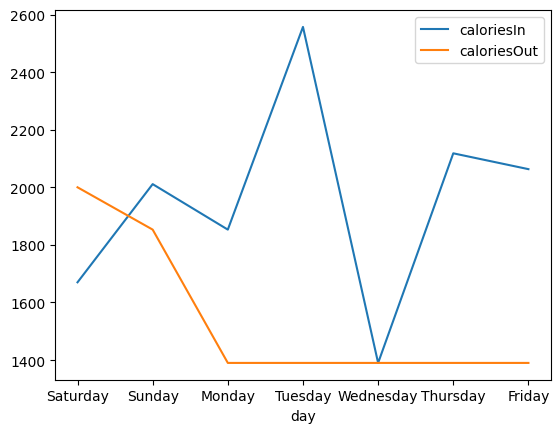

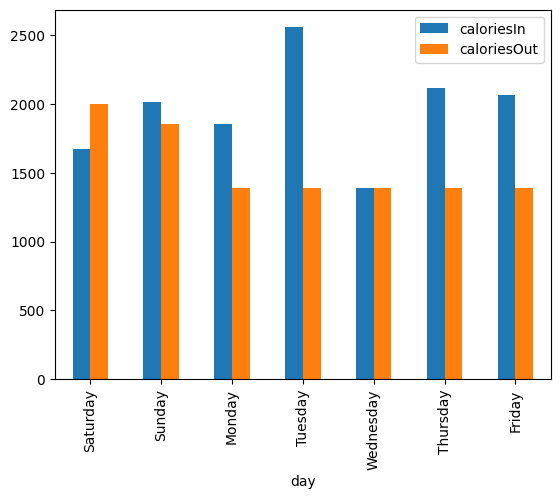

In [ ]:

import pandas as pd

# Create a list of data to be represented in x-axis
days = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' ,
        'Wednesday' , 'Thursday' , 'Friday' ]

# Create a list of data to be
# represented in y-axis
caloriesIn = [ 1670 , 2011 , 1853 , 2557 ,1390 , 2118 , 2063 ]
caloriesOut = [ 2000 , 1853 , 1390 , 1390 ,1390 , 1390 , 1390 ]

# Create a dataframe using the two lists
df_days_calories = pd.DataFrame({'day' : days , 'caloriesIn' :caloriesIn ,"caloriesOut":caloriesOut })


print(df_days_calories)
df_days_calories.plot( x= 'day' ,y=['caloriesIn',"caloriesOut"]  )


df_days_calories.plot(x= 'day' ,y=['caloriesIn',"caloriesOut"],kind="bar")

In [ ]:

taxisDf['pickup'] =  pd.to_datetime(taxisDf['pickup'], format='%Y-%m-%d %H:%M:%S')
taxisDf['pickup_date'] =  taxisDf['pickup'].dt.date
print(taxisDf.head())
print(taxisDf)

               pickup             dropoff  passengers  distance  fare   tip  tolls  total   color      payment            pickup_zone           dropoff_zone pickup_borough dropoff_borough pickup_date
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15    0.0  12.95  yellow  credit card        Lenox Hill West    UN/Turtle Bay South      Manhattan       Manhattan  2019-03-23
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00    0.0   9.30  yellow         cash  Upper West Side South  Upper West Side South      Manhattan       Manhattan  2019-03-04
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36    0.0  14.16  yellow  credit card          Alphabet City           West Village      Manhattan       Manhattan  2019-03-27
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15    0.0  36.95  yellow  credit card              Hudson Sq         Yorkville West      Manhattan       Manhattan  2019-03-10


<Axes: ylabel='Frequency'>

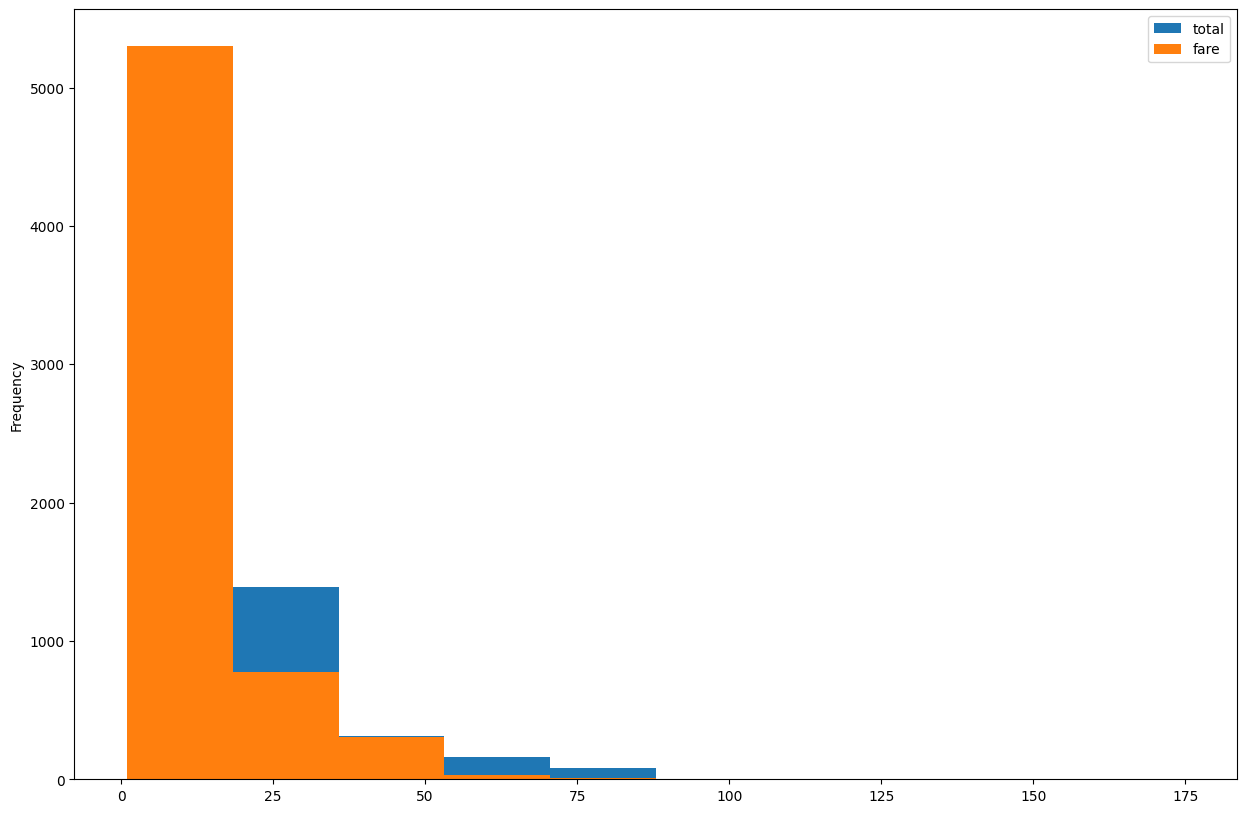

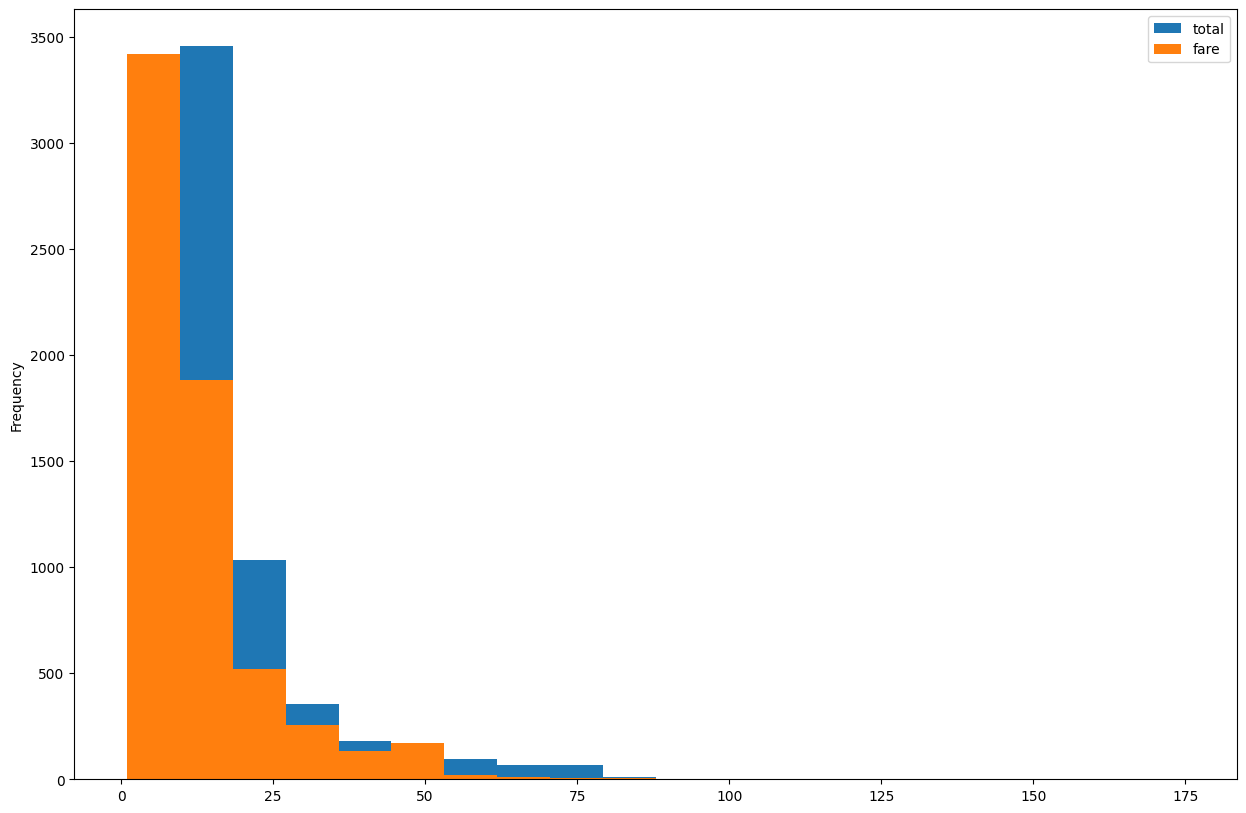

In [ ]:
taxisDf[["total","fare"]].plot(kind="hist", figsize=(15, 10))

taxisDf[["total","fare"]].plot.hist(bins=20, figsize=(15, 10))

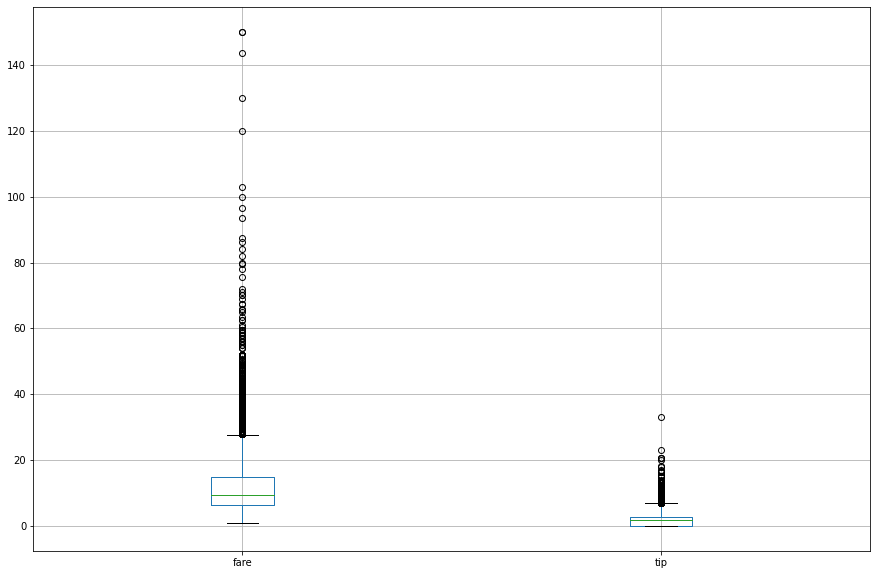

In [ ]:
taxisDf.boxplot(column=['fare', 'tip'], figsize=(15, 10))


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31cac14b50>,
      dtype=object)

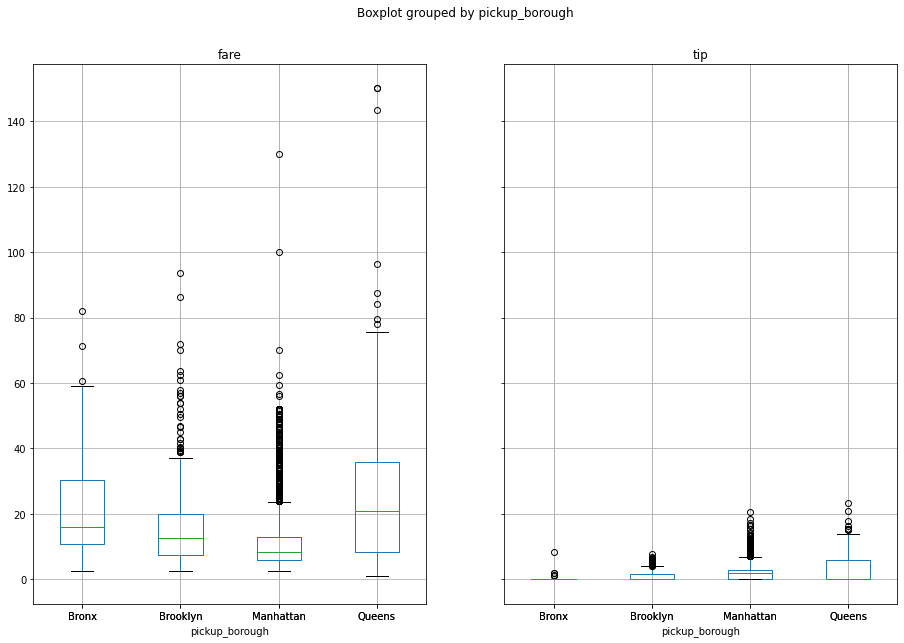

In [ ]:
taxisDf.boxplot(column=['fare', 'tip'],by= "pickup_borough", figsize=(15, 10))